In [7]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data preprocessing useful function
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
from tensorflow import keras
from tensorflow.keras import backend as clear
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

# Functions for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
# 載入經過前處理的資料集
df = pd.read_csv("new_airline_passenger_satisfaction.csv")
df

,age,flight_distance,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,customer_type_Loyal Customer,type_of_travel_Business travel,customer_class_Business,customer_class_Eco,customer_class_Eco Plus,satisfaction_satisfied
0,13,460,3,3,5,3,5,5,4,3,4,4,5,5,1,0,0,0,1,0
1,25,235,3,3,1,3,1,1,1,5,3,1,4,1,0,1,1,0,0,0
2,26,1142,2,2,5,5,5,5,4,3,4,4,4,5,1,1,1,0,0,1
3,25,562,2,5,2,2,2,2,2,5,3,1,4,2,1,1,1,0,0,0
4,61,214,3,3,4,5,5,3,3,4,4,3,3,3,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,34,526,3,3,4,3,4,4,3,2,4,4,5,4,0,1,1,0,0,0
129483,23,646,4,4,4,4,4,4,4,5,5,5,5,4,1,1,1,0,0,1
129484,17,828,2,1,2,1,2,2,4,3,4,5,4,2,1,0,0,1,0,0
129485,14,1127,3,3,4,4,4,4,3,2,5,4,5,4,1,1,1,0,0,1


In [3]:
# 使用 minimax scaling 正規化技術把資料尺度轉到0~1
MMscaler = MinMaxScaler(feature_range=(0, 1))
scaling = MMscaler.fit_transform(df)
scaled_data = pd.DataFrame(data = scaling)
scaled_data.columns = [i for i in df.columns]
scaled_data.head()

,age,flight_distance,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,customer_type_Loyal Customer,type_of_travel_Business travel,customer_class_Business,customer_class_Eco,customer_class_Eco Plus,satisfaction_satisfied
0,0.076923,0.086632,0.6,0.6,1.0,0.6,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.230769,0.041195,0.6,0.6,0.2,0.6,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.0,1.0,1.0,0.0,0.0,0.0
2,0.243590,0.224354,0.4,0.4,1.0,1.0,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0,1.0,1.0,1.0,0.0,0.0,1.0
3,0.230769,0.107229,0.4,1.0,0.4,0.4,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4,1.0,1.0,1.0,0.0,0.0,0.0
4,0.692308,0.036955,0.6,0.6,0.8,1.0,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6,1.0,1.0,1.0,0.0,0.0,1.0


In [4]:
# 設定因變數 x with minimax
x = scaled_data.drop(['satisfaction_satisfied'], axis = 1).copy()

# 設定目標變數 y with minimax
y = scaled_data['satisfaction_satisfied'].copy()
y = y.astype(int)
y

0         0
1         0
2         1
3         0
4         1
         ..
129482    0
129483    1
129484    0
129485    1
129486    0
Name: satisfaction_satisfied, Length: 129487, dtype: int32

In [9]:
# Split the data (split into 67% training data & 33% testing data) (lock seed) 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 2000)

print('y_train:',Counter(y_train))
print('------------------------------------')
print('y_test :',Counter(y_test))

y_train: Counter({0: 49064, 1: 37692})
------------------------------------
y_test : Counter({0: 24161, 1: 18570})


# 神經網路訓練

In [10]:
# 建立網路
input_features = x.shape[1]

# Create the model
clear.clear_session()
model=Sequential()

# Add input layer & first hidden layer 
model.add(Dense(units = input_features, input_dim = input_features, activation = 'relu'))

# Add second hidden layer
model.add(Dense(units = input_features*2, activation = 'relu'))

# Add output layer
model.add(Dense(units = 1, activation = 'sigmoid'))

# Compile the defined Net
opt = Adam(learning_rate = 0.003)    # 調 learning_rate
model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

# Finally check the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                380       
                                                                 
 dense_1 (Dense)             (None, 38)                760       
                                                                 
 dense_2 (Dense)             (None, 1)                 39        
                                                                 
Total params: 1,179
Trainable params: 1,179
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 開始訓練
history = model.fit(x_train, y_train, epochs = 100, batch_size = 64, verbose = 1, validation_split = 0.33)

Epoch 1/100
909/909 [==============================] - 3s 2ms/step - loss: 0.2772 - accuracy: 0.8820 - val_loss: 0.1869 - val_accuracy: 0.9229
Epoch 2/100
909/909 [==============================] - 1s 2ms/step - loss: 0.1807 - accuracy: 0.9261 - val_loss: 0.1705 - val_accuracy: 0.9316
Epoch 3/100
909/909 [==============================] - 2s 2ms/step - loss: 0.1660 - accuracy: 0.9324 - val_loss: 0.1586 - val_accuracy: 0.9389
Epoch 4/100
909/909 [==============================] - 2s 2ms/step - loss: 0.1562 - accuracy: 0.9362 - val_loss: 0.1574 - val_accuracy: 0.9410
Epoch 5/100
909/909 [==============================] - 2s 2ms/step - loss: 0.1484 - accuracy: 0.9390 - val_loss: 0.1434 - val_accuracy: 0.9432
Epoch 6/100
909/909 [==============================] - 2s 2ms/step - loss: 0.1442 - accuracy: 0.9402 - val_loss: 0.1572 - val_accuracy: 0.9344
Epoch 7/100
909/909 [==============================] - 2s 2ms/step - loss: 0.1403 - accuracy: 0.9419 - val_loss: 0.1359 - val_accuracy: 0.9460

In [12]:
# 使用 history function 取得訓練結果
modeling_result = history.history
print(round((np.mean(modeling_result['val_accuracy']))*100,2),'+/-',round((np.std(modeling_result['val_accuracy']))*100,2))

95.01 +/- 0.56


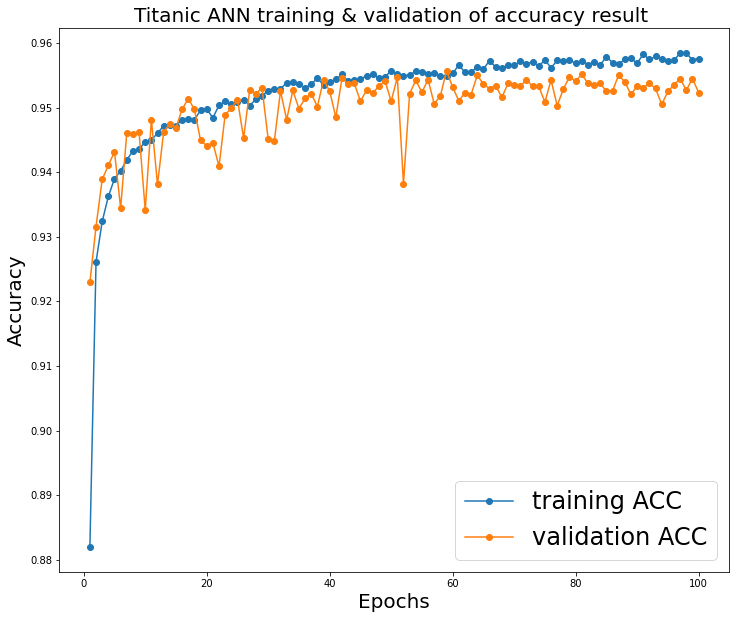

In [13]:
# 視覺化訓練結果
training_acc_values = modeling_result['accuracy']
val_acc_values = modeling_result['val_accuracy']
epochs = range(1, len(training_acc_values) + 1)

plt.figure(figsize = (12,10))
plt.xlabel('Epochs', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.title('Titanic ANN training & validation of accuracy result ', fontsize = 20)

plt.plot(epochs, training_acc_values, marker = 'o', label = 'training ACC')
plt.plot(epochs, val_acc_values,marker = 'o', label = 'validation ACC')
plt.legend(loc = 4, fontsize = 24)
plt.show()

In [14]:
# Save the trained model
model.save("ANN_model.h5")   #  .h5 必須
print('Model has been saved...')

Model has been saved...


In [15]:
# Restore the saved model for testing
ANN_model = keras.models.load_model("ANN_model.h5")
print('Model successfully loaded...')

Model successfully loaded...


In [16]:
# 在測試集上使用模型，並將預測結果轉換為二元分類
testing_prediction = (ANN_model.predict_on_batch(x_test) > 0.5).astype('int')
testing_prediction

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [17]:
# 計算評估指標
testing_acc = accuracy_score(y_test, testing_prediction)
testing_f1s = f1_score(y_test, testing_prediction, pos_label = 1)
testing_pre = precision_score(y_test, testing_prediction, pos_label = 1)
testing_sen = sensitivity_score(y_test, testing_prediction, pos_label = 1)
testing_spe = specificity_score(y_test, testing_prediction, pos_label = 1)
testing_cm = confusion_matrix(y_test, testing_prediction)
print('Testing result:')
print('Testing ACC:', round(testing_acc*100,2))
print('Testing f1s:', round(testing_f1s*100,2))
print('Testing pre:', round(testing_pre*100,2))
print('Testing sen:', round(testing_sen*100,2))
print('Testing spe:', round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

Testing result:
Testing ACC: 95.65
Testing f1s: 94.87
Testing pre: 97.25
Testing sen: 92.61
Testing spe: 97.98

Testing confusion matrix:
[[23674   487]
 [ 1372 17198]]
